# Credit Card Fraud Detection #

About the Dataset

This dataset contains transactions made by credit cards in September 2013 by European cardholders.It presents transactions that occurred in two days.
The dataset has 31 features, out of which 28 features have been anonymized and are labeled as V1, V2, V3, and so on. The remaining features are time, amount, and class (which indicates whether the transaction was fraudulent or not). 

It is highly important that the credit card companies should recognize fraudulent transactions inorder to protect the customers for not being charged for items that they did not purchase.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

sns.set(style='white', context='notebook')



# Reading and understanding the data

### Import Dataset

In [3]:

transactions = pd.read_csv(r'C:/Users/matebook x/Desktop/MTN/Fraud Detection/creditcard.csv')

In [4]:
transactions.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
transactions.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
transactions.shape

(284807, 31)

This Dataset contains 284807 rows and 31 columns.

In [7]:
transactions.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Column Description:

Time - Number of seconds elapsed between this transaction and the first transaction in the dataset.

Class - Target variable- 1 for fraudulent transaction and 0 for non-fraudulent transaction.

Amount - Transaction Amount.

V1- V28 - columns obtained after PCA Dimensionality reduction to protect user identities and sensitive features.

In [8]:
# dataset info
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# checking for any nullvalues in the dataframe.
transactions.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



The dataset contains absolutely no null values.

In [10]:
# checking the numerical statistics of our data
transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


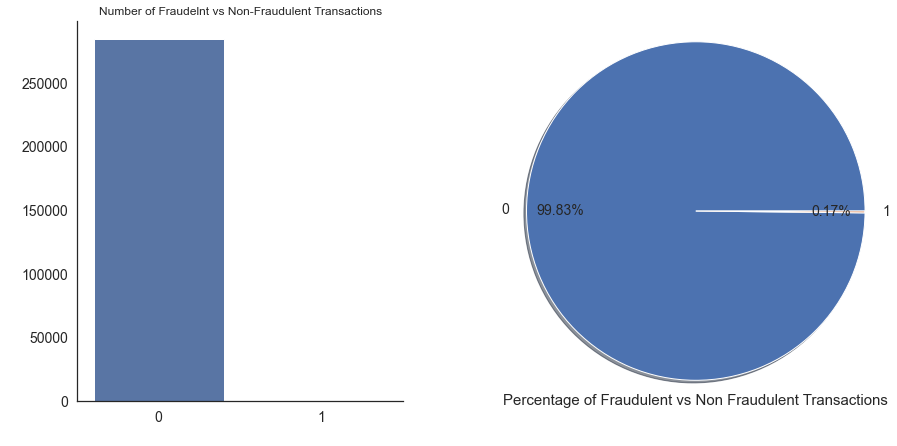

In [11]:
# checking the target variable

plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=transactions["Class"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.title('Number of Fraudelnt vs Non-Fraudulent Transactions')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(transactions["Class"].value_counts(),
        labels=list(transactions["Class"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Percentage of Fraudulent vs Non Fraudulent Transactions', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [12]:
transactions['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Insight#1 : 

1. From the above plot,it is very clear that the target variable 'Class' is highly imbalanced.Only 0.17% of the total transcations consist of fraudulent transactions.

2. Number of Fraudulent cases - 492

3. Number of Non-Fraudulent cases - 284315

4. This suggests that fraudulent transactions are not frequently happening and that most credit card transactions are non-fraudulent transactions.

Since Time and Amount are the only features availabe for detailed study without PCA we will have a close study into these two features to get some insights about dataset.

In [13]:
transactions["Time"].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [14]:
# converting time from seconds to hour

transactions['Hour']= transactions['Time']/3600

Text(0, 0.5, '# Transactions')

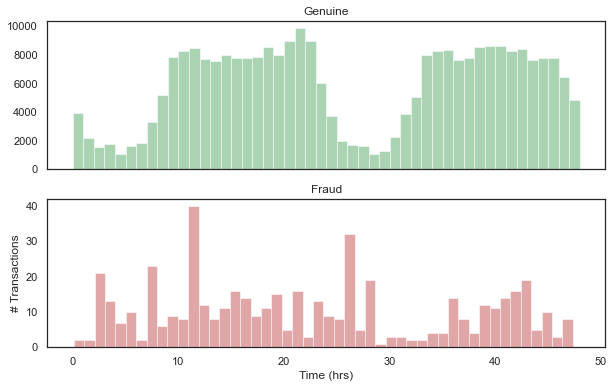

In [15]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(10,6))
ax1.hist(transactions.Hour[transactions.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(transactions.Hour[transactions.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# Transactions')

# Insight#2 : 


There is a clear pattern of fraud transactions over 24 hours.
The percentage of fraud transactions is higher during late night and early morning hours.
Fraudsters might be taking advantage of low transactionn volumn during these hours.


Checking Amount varaible

Text(0, 0.5, '# transactions')

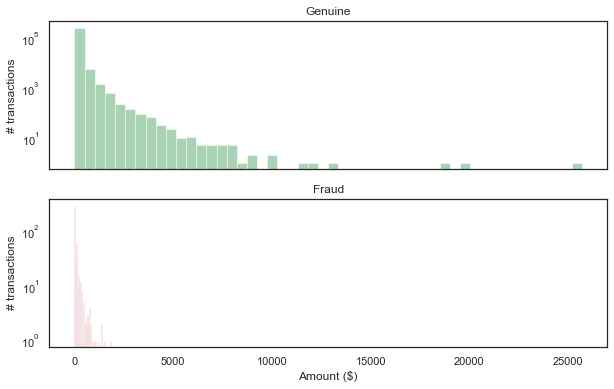

In [16]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(transactions.Amount[transactions.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(transactions.Amount[transactions.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [17]:
# splitting the dataset to fraudulent and non-fraudulent transactions.

fraudulent_transactions = transactions[transactions['Class'] == 1]
non_fraudulent_transactions = transactions[transactions['Class'] == 0]

In [18]:
fraudulent_transactions['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
non_fraudulent_transactions['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Insight#3 : 

1. Fraudulent transactions are mostly skewed towards lower amount whereas non-fraudulent transactions are spreaded across low to high amount.

2.  From the above above plot,it is clear that the maximum amount involved with fraudulent transactions is less than 10,000 whereas that in            non-fraudulent transactions is above 10,000.

3. We can infer that 'Amount' column has a prediction power in this dataset.

4. The maximum amount involved in fraudulent transaction is 2125.00 whereas that in non-fraudukent is 25691.00.


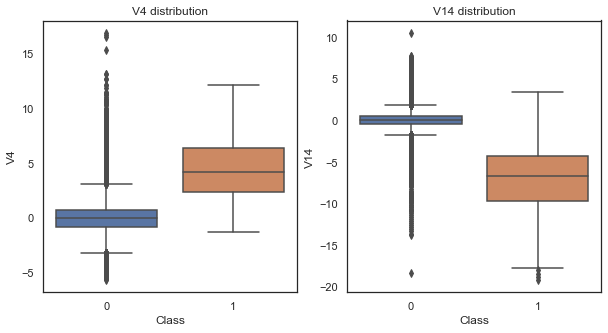

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.boxplot(x='Class', y='V4', data=transactions, ax=ax[0])
sns.boxplot(x='Class', y='V14', data=transactions, ax=ax[1])
ax[0].set_title('V4 distribution')
ax[1].set_title('V14 distribution')
plt.show()

# Insight#4 : 

 Fraudulent transactions have different patterns from non-fraudulent transactions: A comparison of the distribution of anonymized features between fraudulent and non-fraudulent transactions reveals that the two types of transactions have different patterns. For example, fraudulent transactions tend to have lower values of V4 and V14, and higher values of V2 and V11.

Correlation Matrix

<AxesSubplot:>

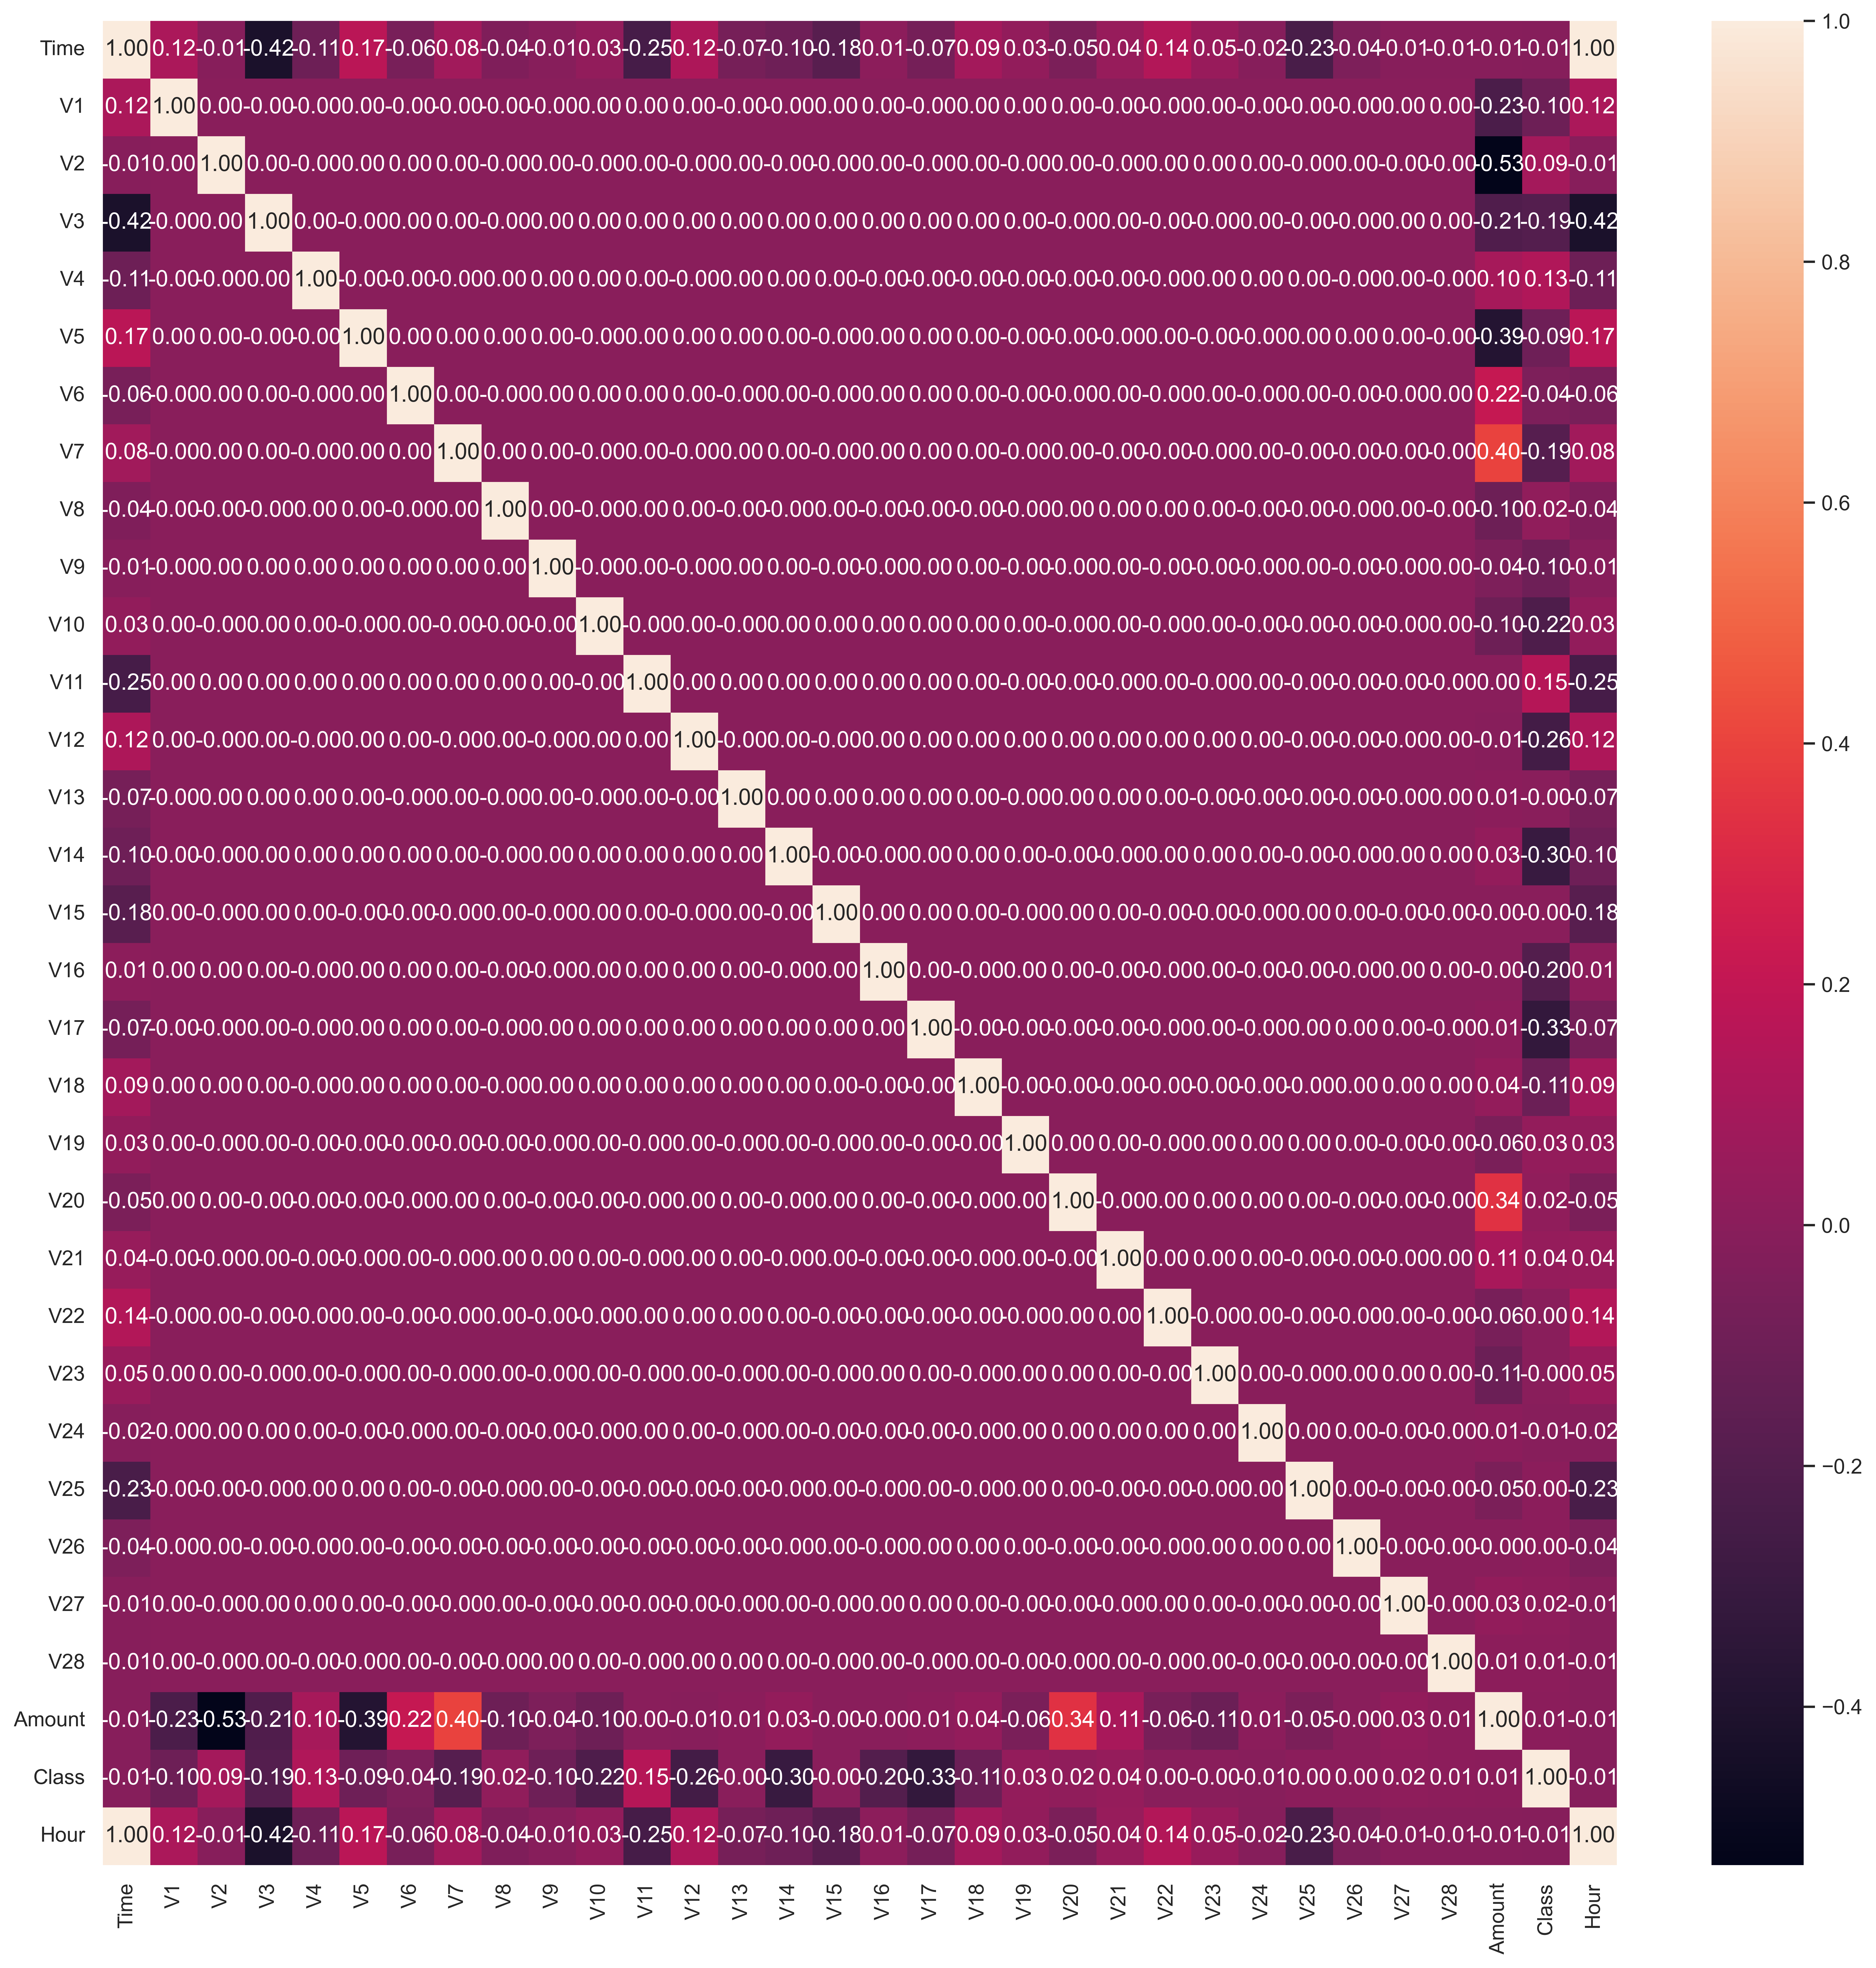

In [21]:
fig = plt.figure(figsize=(18,18), dpi = 480)
sns.heatmap(transactions.corr(), annot = True, fmt = '.2f')


The dataset is not correlated,it may be due to oversampling of available data or may be due to PCA application.

### Modelling ML Pipelines

### Scaling the Data

In [22]:
# scaling the non scaled features

from sklearn.preprocessing import RobustScaler

rob_scale = RobustScaler()

non_fraudulent_transactions['scaled_amount']=rob_scale.fit_transform(non_fraudulent_transactions['Amount'].values.reshape(-1,1))
fraudulent_transactions['scaled_amount']=rob_scale.fit_transform(fraudulent_transactions['Amount'].values.reshape(-1,1))

#non_fraudulent_transactions['scaled_Time']=rob_scale.fit_transform(non_fraudulent_transactions['Time'].values.reshape(-1,1))
#fraudulent_transactions['scaled_Time']=rob_scale.fit_transform(fraudulent_transactions['Time'].values.reshape(-1,1))

non_fraudulent_transactions.drop(['Amount','Time'], axis=1,inplace=True)
fraudulent_transactions.drop(['Amount','Time'], axis=1,inplace=True)



### Under Sampling Dataset

Since this is highly imbalanced dataset,we are trying under sampling technique to balance the dataset.Undersampling Technique is used to balance the uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets.

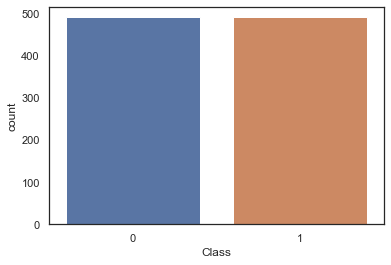

In [23]:
ls = non_fraudulent_transactions.sample(n=492)
ls.Class.value_counts()
df2 = pd.concat([fraudulent_transactions,ls], axis = 0)
sns.countplot(df2["Class"]);

Now the data has been balanced for applying ML techniques

### Model Building

In [24]:
#spliting the data for target and features
X = df2.drop(columns=['Class'])
y = df2['Class']

#creating the test train split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [25]:
models = {
    "LogisiticRegression": LogisticRegression(solver='liblinear'),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

from sklearn.model_selection import cross_val_score

def training_model():
    
    for key, model in models.items():
        model.fit(X_train,y_train)
        cv_score = cross_val_score(model,X_train,y_train,cv=5)
        print("Classifiers: ", key, "has a training score of", round(cv_score.mean(), 2) * 100, "% accuracy score")
        
training_model()

Classifiers:  LogisiticRegression has a training score of 93.0 % accuracy score
Classifiers:  KNearest has a training score of 92.0 % accuracy score
Classifiers:  Support Vector Classifier has a training score of 92.0 % accuracy score
Classifiers:  DecisionTreeClassifier has a training score of 91.0 % accuracy score
Classifiers:  Gradient Boosting Classifier has a training score of 94.0 % accuracy score


In [26]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
 
#predict the model
y_calc=logreg.predict(X_test)

from sklearn.metrics import average_precision_score, precision_score, recall_score, PrecisionRecallDisplay
print('AUPRC: ', average_precision_score(y_true=y_test, y_score=y_calc))
print('Recall: ', recall_score(y_true=y_test, y_pred=y_calc))
print('Precision:', precision_score(y_true=y_test, y_pred=y_calc))
#display = PrecisionRecallDisplay.from_estimator(estimator=LogisticRegression, X=X_test, y=y_test)
#plt.show()



AUPRC:  0.9498098397348012
Recall:  0.9191919191919192
Precision: 0.9891304347826086


In [27]:
# Classification Report

print(classification_report(y_test,y_calc))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95        99

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



In [ ]:
print("Isolation Forest Performance:")
print("Precision:", precision_score(y_test, y_pred_isof))
print("Recall:", recall_score(y_test, y_pred_isof))
print("F1-score:", f1_score(y_test, y_pred_isof))


# Insight#5 : 

We can utilize the Machine Learning Algorithms including Logistic Regression and Gradient Boosting Classifier with an accuracy of 94% for predicting fraud transactions.

# Here are the five actionable insights that can be derived from the dataset.# 

1. Imbalance class problem:

Fraudulent transactions account for a small percentage of total transactions.
Only 0.17% of the total transcations consist of fraudulent transactions.This suggests that fraudulent transactions are not frequently happening and that most credit card transactions are non-fraudulent transactions.

2. Class Distribution by time:

There is a clear pattern of fraud transactions over 24 hours.
The percentage of fraud transactions is higher during late night and early morning hours.
Fraudsters might be taking advantage of low transactionn volumn during these hours.


3. Distribution of Transaction Amount:

Fraudulent transactions are mostly skewed towards lower amount whereas non-fraudulent transactions are spreaded across low to high amount.
The maximum amount involved with fraudulent transactions is less than 10K whereas that in non-fraudulent transactions is above 10K.
We can infer that 'Amount' column has a significant prediction power in this dataset.
The maximum amount involved in fraudulent transaction is 2125.00 whereas that in non-fraudukent is 25691.00.The "Amount" feature has a wide range of values and needs to be standardized before it can be used in the model.

4. Transactional Patterns:

Fraudulent transactions have different patterns from non-fraudulent transactions: A comparison of the distribution of anonymized features between fraudulent and non-fraudulent transactions reveals that the two types of transactions have different patterns. For example, fraudulent transactions tend to have lower values of V4 and V14, and higher values of V2 and V11.

5. Application of ML Algorithm for predicting fraudulant transactions: 

We can utilize the Machine Learning Algorithms with an accuracy of above 90 % for predicting fraud transactions.Many machine learning methods, including logistic regression, random forests, and neural networks, can identify fraudulent transactions with high accuracy. These models enable credit card firms to automate fraud detection and lessen the burden of manual inspection.We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.




